In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_train.csv
/kaggle/input/loan-data-set/loan_test.csv


In [2]:
import missingno
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# load dataset
df =  pd.read_csv('/kaggle/input/loan-data-set/loan_train.csv')

In [4]:
df.head(15)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


<AxesSubplot:>

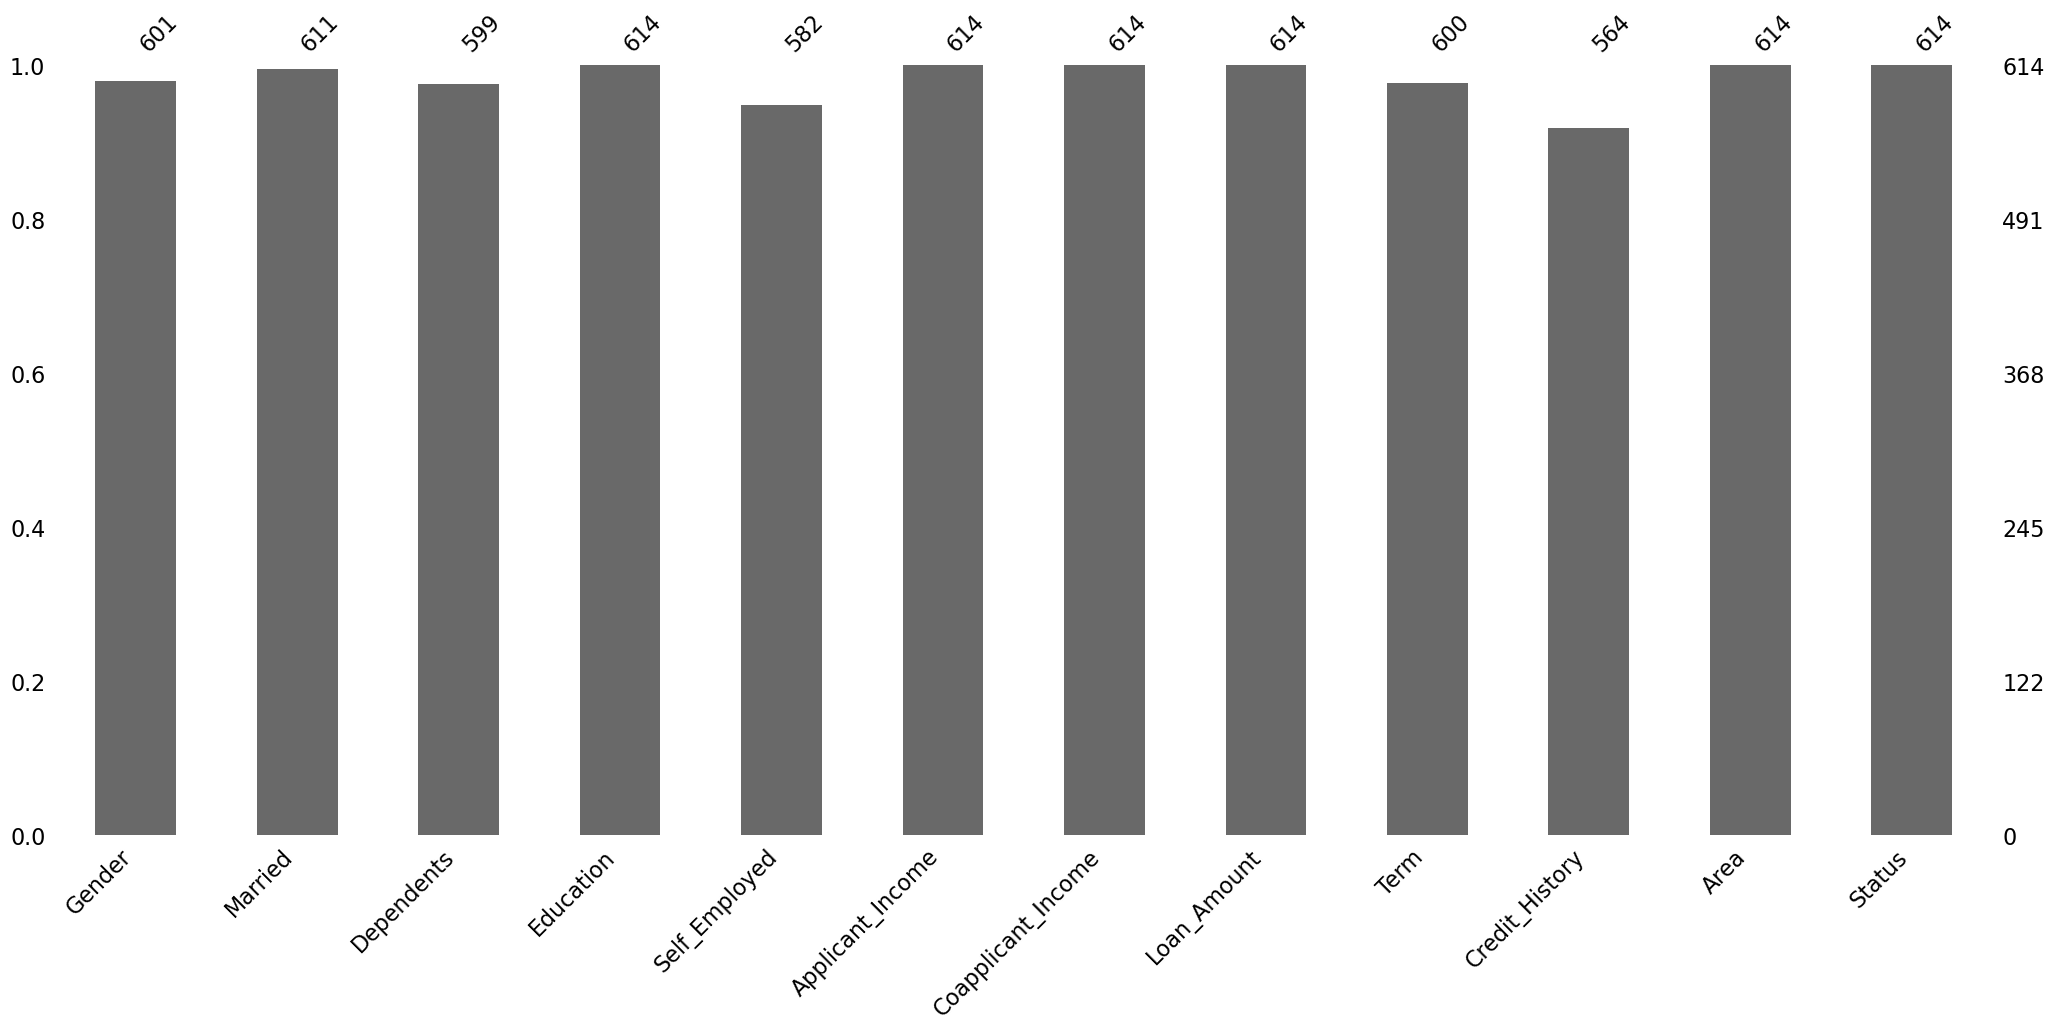

In [5]:
# check missing values
missingno.bar(df)

In [6]:
# processing  misssing values  by base method
for i in df.columns:
    if df[i].isnull().any():
        if df[i].dtypes == 'O':
            df[i].fillna('unknow',inplace=True)
        else :df[i].fillna(df[i].mean(),inplace=True)

<AxesSubplot:>

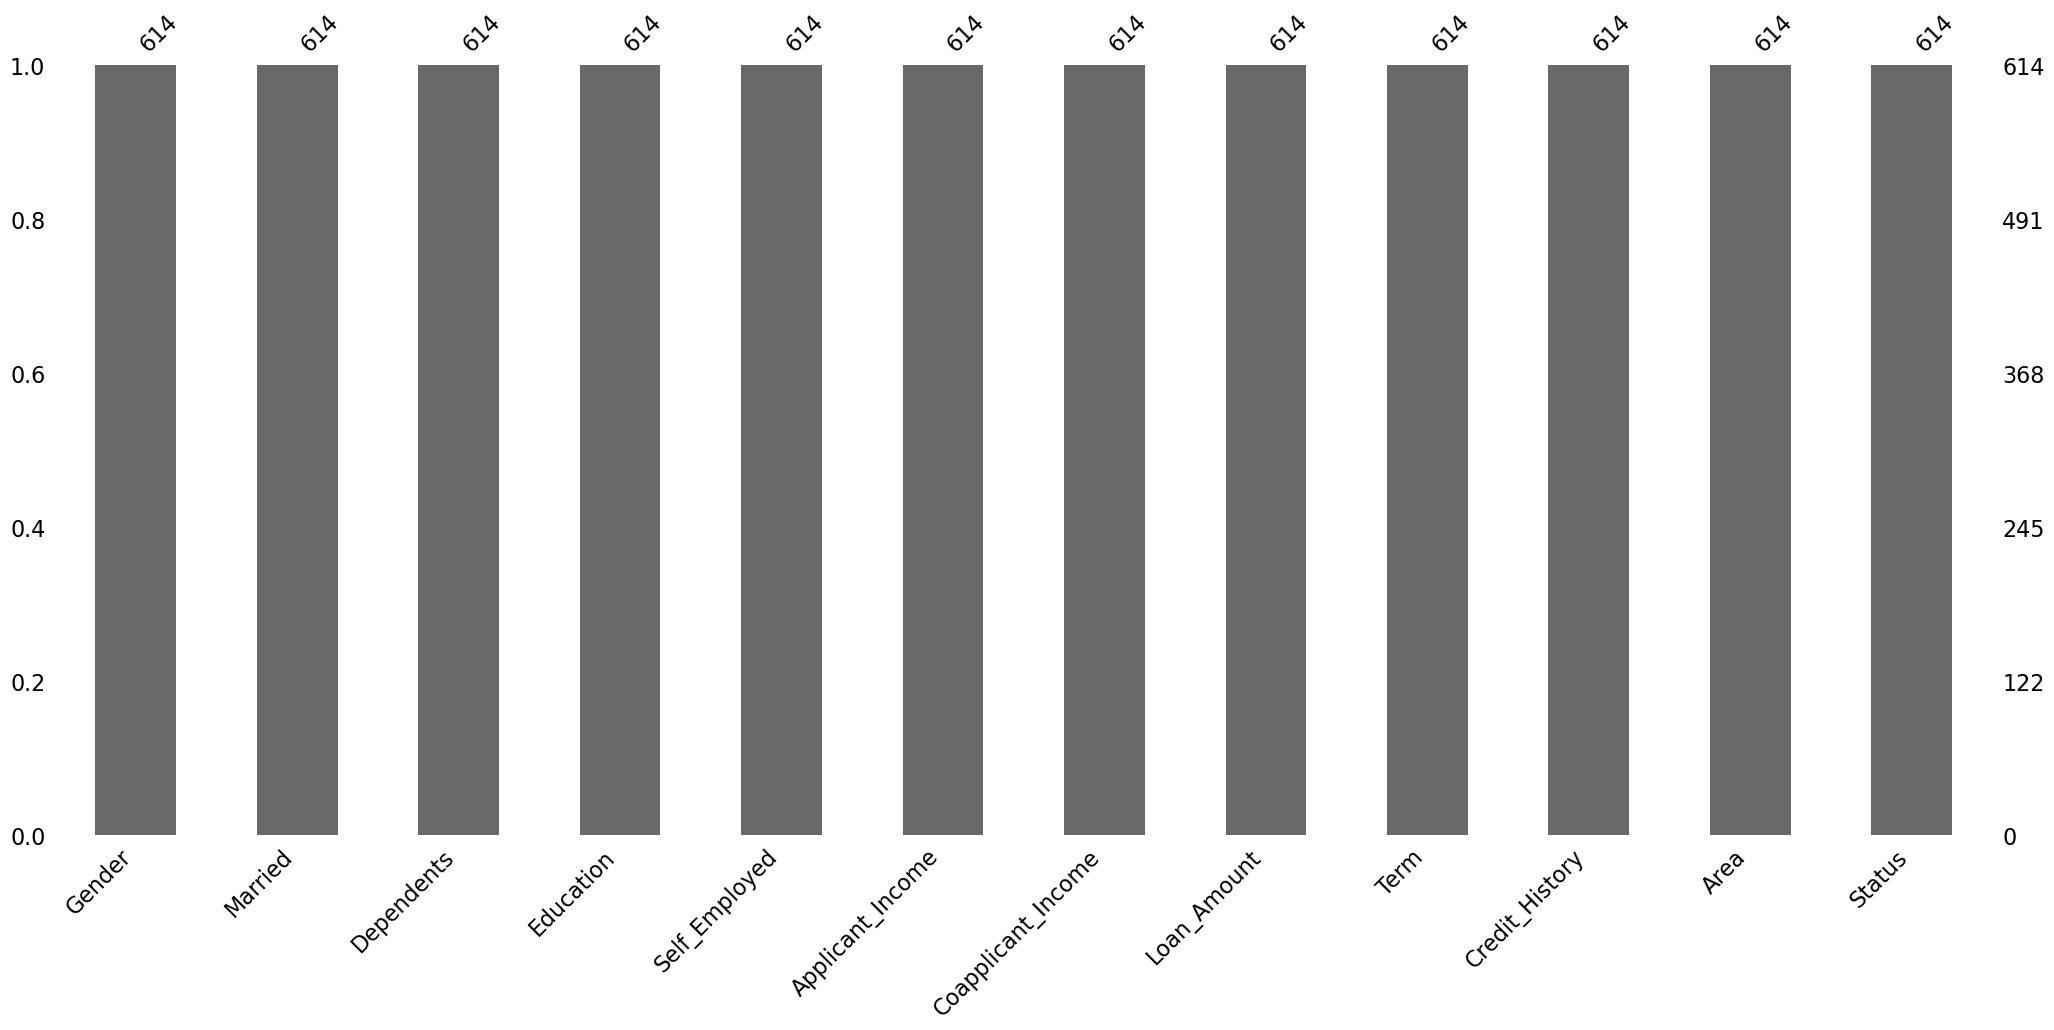

In [7]:
missingno.bar(df)

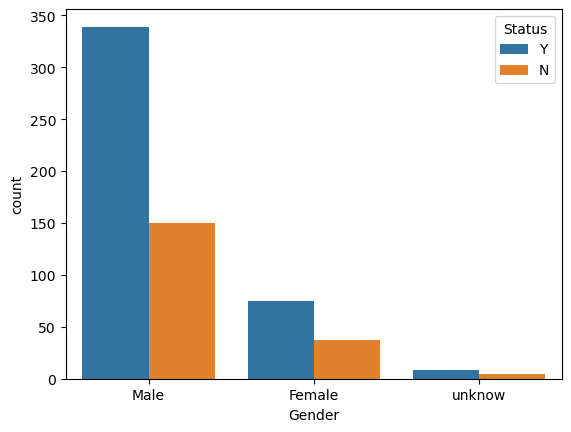

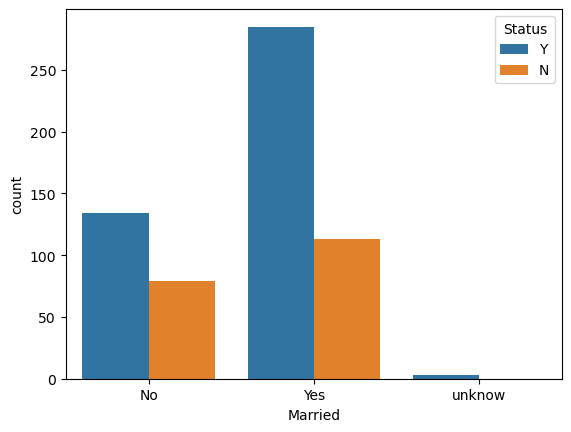

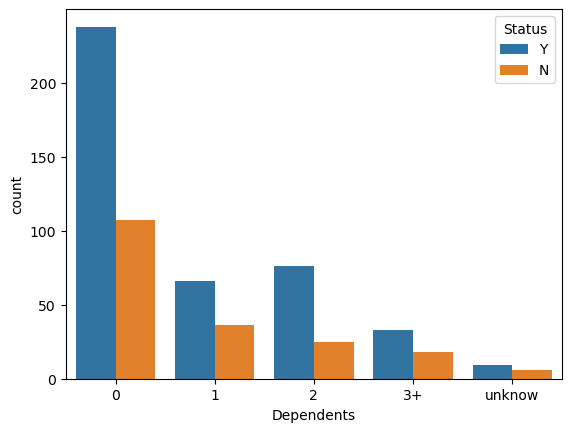

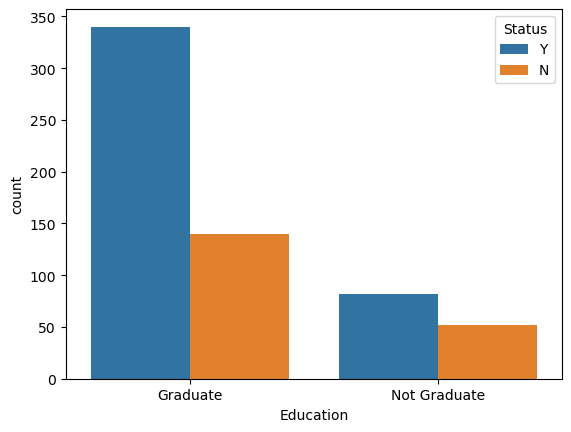

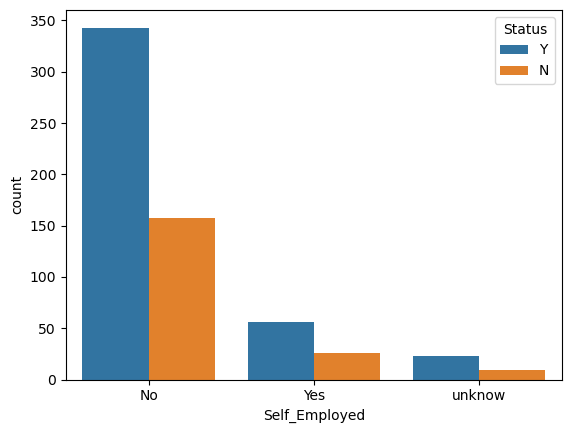

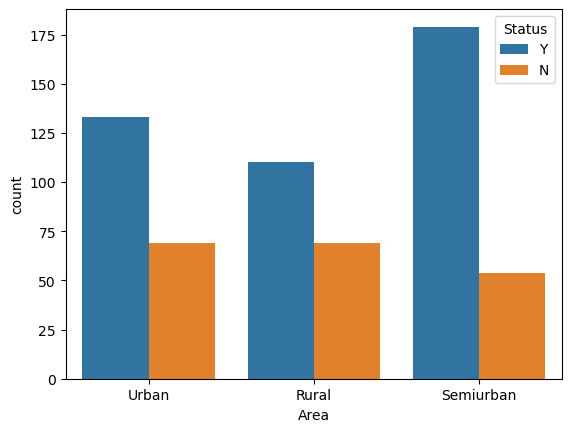

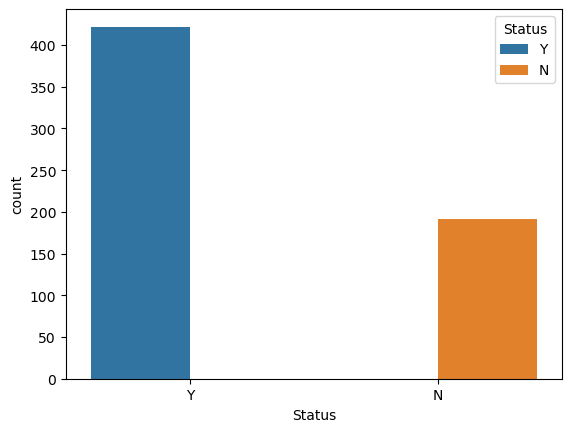

['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History']


In [8]:
# check countvalues of categorical feature  

numberic = []
for i in df.columns:
    if df[i].dtypes == 'O':
       sns.countplot(df,x=i,hue='Status')
       plt.show()
    else: numberic.append(i)
print(numberic)

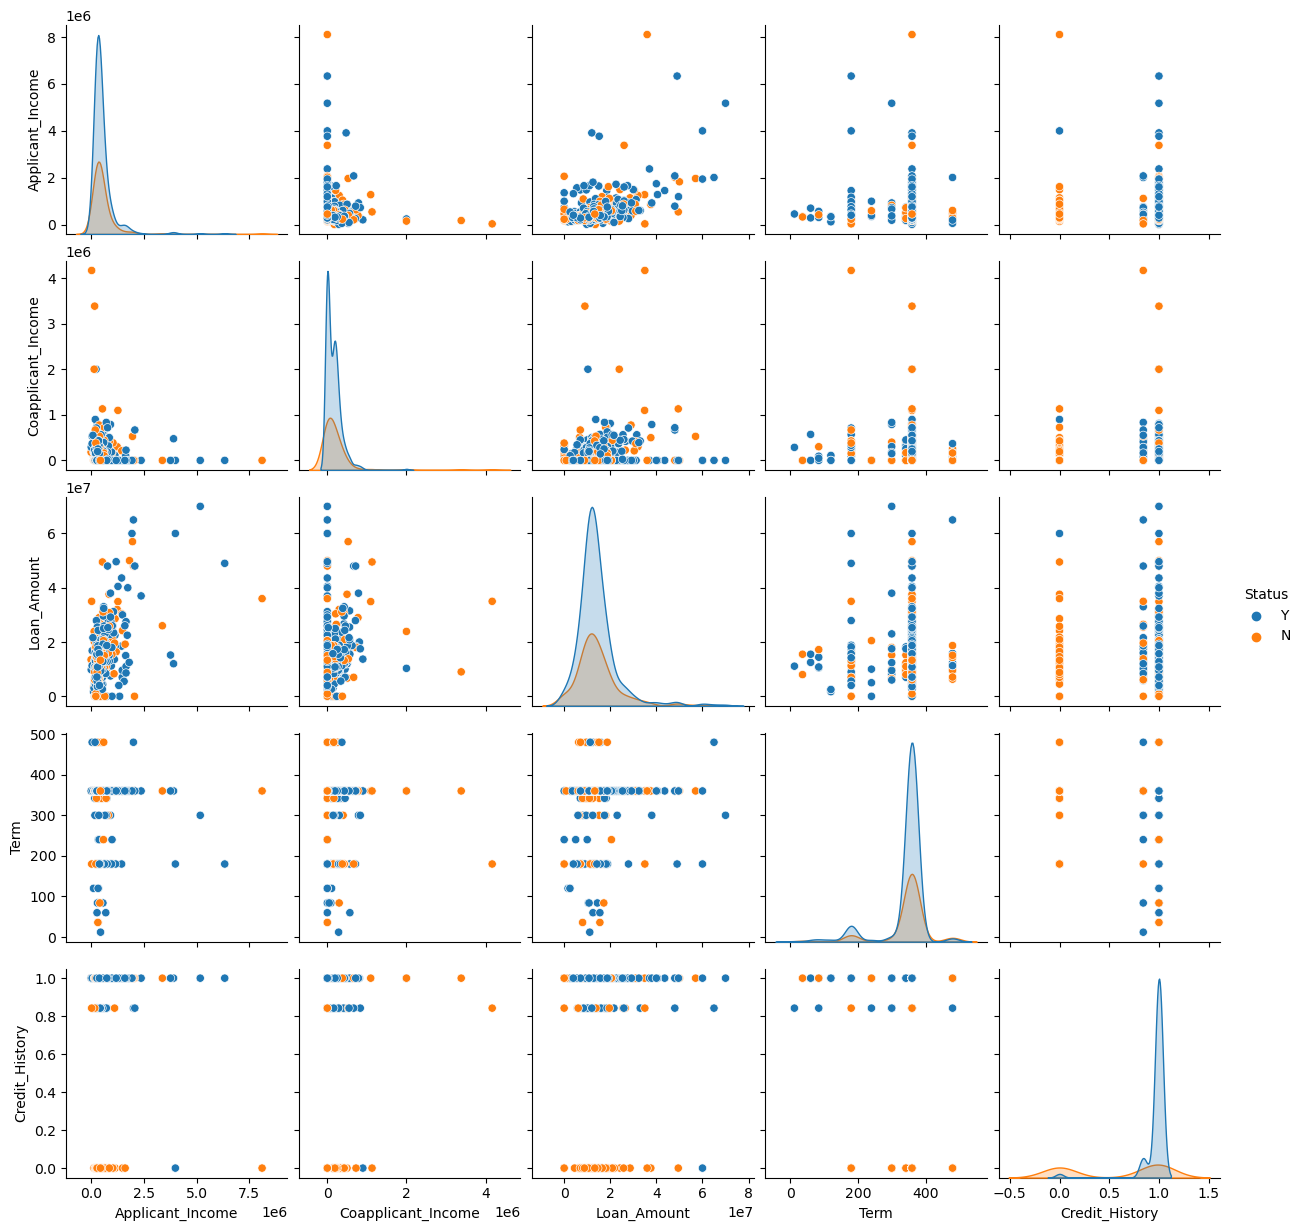

In [9]:
numberic.append('Status')
sns.pairplot(df[numberic],hue='Status')

In [10]:
# numberic encoder the categorical feature us sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    if df[i].dtypes == 'O':
        df[i] =  LabelEncoder().fit_transform(df[i])

In [11]:
fig = px.imshow(df.corr(),text_auto=True)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)
fig.show()

In [12]:
df.head(15)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
5,1,1,2,0,1,541700,419600.0,26700000,360.0,1.0,2,1
6,1,1,0,1,0,233300,151600.0,9500000,360.0,1.0,2,1
7,1,1,3,0,0,303600,250400.0,15800000,360.0,0.0,1,0
8,1,1,2,0,0,400600,152600.0,16800000,360.0,1.0,2,1
9,1,1,1,0,0,1284100,1096800.0,34900000,360.0,1.0,1,0


In [13]:
X =  np.array(df.iloc[:,:-1]).reshape(-1,11)
Y =  np.array(df.iloc[:,-1]).reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)

In [14]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
y_pred = bst.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,accuracy_score
print('accuracy:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['yes','no']))

accuracy: 0.7886178861788617
              precision    recall  f1-score   support

         yes       0.69      0.58      0.63        38
          no       0.82      0.88      0.85        85

    accuracy                           0.79       123
   macro avg       0.76      0.73      0.74       123
weighted avg       0.78      0.79      0.78       123



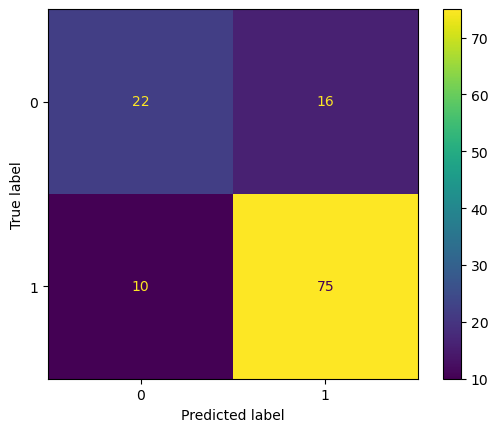

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bst, X_test, y_test)

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [19]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
y_pred = bst.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,accuracy_score
print('accuracy:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['yes','no']))

accuracy: 0.8373983739837398
              precision    recall  f1-score   support

         yes       0.88      0.55      0.68        38
          no       0.83      0.96      0.89        85

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.78       123
weighted avg       0.84      0.84      0.83       123



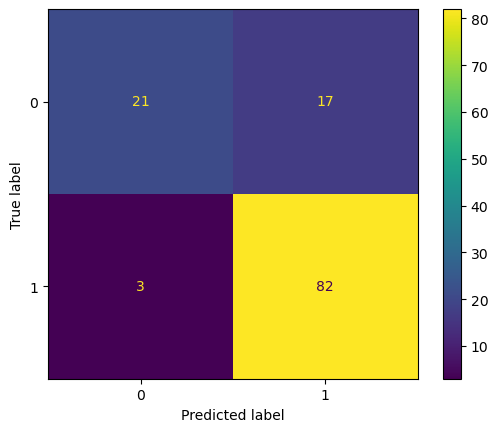

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bst, X_test, y_test)